In [1]:
#|default_exp app

# Sports Equipment Recognizer

In [2]:
!pip install -Uqq fastai nbdev python-multipart

In [9]:
!pip install -qq gradio==4.44.1


In [1]:
from fastai.vision.all import *

In [3]:
#!export
from fastai.vision.all import load_learner
# import python_multipart
import gradio as gr

c:\Users\ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# %cd /content/drive/My Drive/Sports Equipment

In [4]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [5]:
#!export
model = load_learner('models/sport-recognizer-v3.pkl')

In [7]:
#!export
equipment_labels = (
    'Archery Bow',
    'Badminton Shuttlecock',
    'Baseball Bat',
    'Basketball ball',
    'Bowling Ball',
    'Boxing Gloves',
    'Carrom board',
    'Chessboard',
    'Cricket Bat',
    'Frisbee disc',
    'Golf ball',
    'Hockey Stick',
    'Ice Skates',
    'Rugby Ball',
    'Skateboard',
    'Ski Poles',
    'Soccer ball',
    'Table Tennis Paddle',
    'Tennis Racket',
    'Volleyball ball'

)

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(equipment_labels, map(float, probs)))

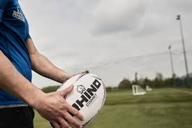

In [8]:
img = PILImage.create(f'test_images/unknown_01.jpg')
img.thumbnail((192,192))
img

In [9]:
recognize_image(img)

{'Archery Bow': 1.3149792721378617e-06,
 'Badminton Shuttlecock': 2.1758669390692376e-05,
 'Baseball Bat': 1.4391329386853613e-05,
 'Basketball ball': 1.8072672673952184e-06,
 'Bowling Ball': 5.297665666148532e-07,
 'Boxing Gloves': 0.00013016477169003338,
 'Carrom board': 9.873053130604603e-08,
 'Chessboard': 1.9229307781643e-06,
 'Cricket Bat': 3.8676949770888314e-05,
 'Frisbee disc': 0.0001814787246985361,
 'Golf ball': 9.848392073763534e-05,
 'Hockey Stick': 2.103522319885087e-06,
 'Ice Skates': 2.0357745142973727e-06,
 'Rugby Ball': 0.9992632269859314,
 'Skateboard': 3.2540399388381047e-06,
 'Ski Poles': 1.2386723824420187e-07,
 'Soccer ball': 2.162175405828748e-05,
 'Table Tennis Paddle': 1.056043288372166e-06,
 'Tennis Racket': 3.3779870136640966e-05,
 'Volleyball ball': 0.00018213290604762733}

In [12]:
#!export
image = gr.Image()  
label = gr.Label() 
examples = [
    'test_images/unknown_00.jpg',
    'test_images/unknown_01.jpg',
    'test_images/unknown_02.jpg',
    'test_images/unknown_03.jpg'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# Notebook to Python Script Export

In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')